In [711]:
# This code was adapted from course material by Jenna Wiens (UMichigan).

import sys

In [712]:
# To add your own Drive Run this cell.
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [713]:
# Please specify the full paths to the regression_train.csv
# and regression_test.csv files in your gdrive directory
### ========== TODO : START ========== ###
base_dir = '/content/gdrive/My Drive/Colab Notebooks/CS 146/PS2'
train_path = f'{base_dir}/regression_train.csv'
test_path = f'{base_dir}/regression_test.csv'
### ========== TODO : END ========== ###

In [714]:
# Use only the provided packages!
import os
import numpy as np
import matplotlib.pyplot as plt
import time

In [715]:
######################################################################
# classes
######################################################################

class Data :
    
    def __init__(self, X=None, y=None) :
        """
        Data class.
        
        Attributes
        --------------------
            X       -- numpy array of shape (n,d), features
            y       -- numpy array of shape (n,), targets
        """
        
        # n = number of examples, d = dimensionality
        self.X = X
        self.y = y
    
    def load(self, filename) :
        """
        Load csv file into X array of features and y array of labels.
        
        Parameters
        --------------------
            filename -- string, filename
        """
        
        # load data
        with open(filename, 'r') as fid :
            data = np.loadtxt(fid, delimiter=",")
        
        # separate features and labels
        self.X = data[:,:-1]
        self.y = data[:,-1]
    
    def plot(self, **kwargs) :
        """Plot data."""
        
        if 'color' not in kwargs :
            kwargs['color'] = 'b'
        
        fig = plt.figure(figsize=(10, 5))
        plt.scatter(self.X, self.y, **kwargs)
        plt.xlabel('x', fontsize = 16)
        plt.ylabel('y', fontsize = 16)
        plt.show()

In [716]:
# wrapper functions around Data class
def load_data(filename) :
    data = Data()
    data.load(filename)
    return data

def plot_data(X, y, **kwargs) :
    data = Data(X, y)
    data.plot(**kwargs)

In [717]:
def plot_erms(mrange, train_errs, test_errs):
    fig = plt.figure(figsize=(10, 5))
    plt.plot(mrange, train_errs, 'o-', color='red', label='Training')
    plt.plot(mrange, test_errs, 'o-', color='blue', label='Test')
    plt.xlabel(r'$m$', fontsize = 16)
    plt.ylabel(r'$E_{RMS}$', fontsize = 16)
    plt.title('Polynomial regression error')
    plt.legend()
    plt.show()

In [718]:
class PolynomialRegression() :
    
    def __init__(self, m=1) :
        """
        Ordinary least squares regression.
        
        Attributes
        --------------------
            coef_   -- numpy array of shape (d,)
                       estimated coefficients for the linear regression problem
            m_      -- integer
                       order for polynomial regression
        """
        self.coef_ = None
        self.m_ = m
    
    
    def generate_polynomial_features(self, X) :
        """
        Maps X to an mth degree feature vector e.g. [1, X, X^2, ..., X^m].
        
        Parameters
        --------------------
            X       -- numpy array of shape (n,1), features
        
        Returns
        --------------------
            Phi     -- numpy array of shape (n,(m+1)), mapped features
        """
        
        n,d = X.shape
        
        ### ========== TODO : START ========== ###
        # part b: modify to create matrix for simple linear model
        ''' for part b, this code would have been similar to the code below
        except that we wouldn't need to raise X[i][j] to any power. We can
        just add a column of 1's to the front of the X array. 
        Phi = np.concatenate((np.ones((n,1)), X), axis=1)
         '''
        m = self.m_
        Phi = np.power(np.tile(X, (1, m+1)), np.arange(m+1))

        ### ========== TODO : END ========== ###
        
        return Phi
    

    
    
    def fit_GD(self, X, y, eta=None,
                eps=0, tmax=10000, verbose=False) :
        """
        Finds the coefficients of a {d-1}^th degree polynomial
        that fits the data using least squares batch gradient descent.
        
        Parameters
        --------------------
            X       -- numpy array of shape (n,d), features
            y       -- numpy array of shape (n,), targets
            eta     -- float, step size
            eps     -- float, convergence criterion
            tmax    -- integer, maximum number of iterations
            verbose -- boolean, for debugging purposes
        
        Returns
        --------------------
            self    -- an instance of self
        """
        
        if verbose :
            plt.subplot(1, 2, 2)
            plt.xlabel('iteration')
            plt.ylabel(r'$J(\theta)$')
            plt.ion()
            plt.show()
        
        X = self.generate_polynomial_features(X) # map features
        n,d = X.shape
        eta_input = eta
        self.coef_ = np.zeros(d)                 # coefficients
        err_list  = np.zeros((tmax,1))           # errors per iteration
        
        # GD loop
        for t in range(tmax) :
            ### ========== TODO : START ========== ###
            # part f: update step size
            # change the default eta in the function signature to 'eta=None'
            # and update the line below to your learning rate function
            if eta_input is None :
                eta = 1 / (1 + t)
            else :
                eta = eta_input
            ### ========== TODO : END ========== ###
                
            ### ========== TODO : START ========== ###
            # part d: update theta (self.coef_) using one step of GD
            # hint: you can write simultaneously update all theta using vector math
            self.coef_ -= 2. * eta * np.sum(X.T * (self.predict_base(X) - y), axis=1)
            
            # track error
            # hint: you cannot use self.predict(...) to make the predictions
            y_pred = self.predict_base(X)
            err_list[t] = np.sum(np.power(y - y_pred, 2)) / float(n)    
            ### ========== TODO : END ========== ###
            
            # stop?
            if t > 0 and abs(err_list[t] - err_list[t-1]) <= eps :
                break
            
            # debugging
            if verbose :
                x = np.reshape(X[:,1], (n,1))
                cost = self.cost(x,y)
                plt.subplot(1, 2, 1)
                plt.cla()
                plot_data(x, y)
                self.plot_regression()
                plt.subplot(1, 2, 2)
                plt.plot([t+1], [cost], 'bo')
                plt.suptitle('iteration: %d, cost: %f' % (t+1, cost))
                plt.draw()
                plt.pause(0.05) # pause for 0.05 sec
        
        plt.scatter(range(0, len(err_list)), err_list)
        print('number of iterations: %d' % (t+1))
        
        return self
    
    
    def fit(self, X, y) :
        """
        Finds the coefficients of a {d-1}^th degree polynomial
        that fits the data using the closed form solution.
        
        Parameters
        --------------------
            X       -- numpy array of shape (n,d), features
            y       -- numpy array of shape (n,), targets
            
        Returns
        --------------------        
            self    -- an instance of self
        """
        
        X = self.generate_polynomial_features(X) # map features
        
        ### ========== TODO : START ========== ###
        # part e: implement closed-form solution
        # hint: use np.dot(...) and np.linalg.pinv(...)
        #       be sure to update self.coef_ with your solution
        
        m1 = np.linalg.pinv(np.dot(X.T, X))
        m2 = np.dot(m1, X.T)
        m3 = np.dot(m2, y)
        self.coef_ = m3
        
        ### ========== TODO : END ========== ###
        return self

    def predict_base(self, X):
        ''' generate prediction, where X is the polynomial feature vector 
        (already passed to generate_polynomial_features) '''
        y = np.sum(self.coef_ * X, axis=1)
        return y
    
    def predict(self, X) :
        """
        Predict output for X.
        
        Parameters
        --------------------
            X       -- numpy array of shape (n,d), features
        
        Returns
        --------------------
            y       -- numpy array of shape (n,), predictions
        """
        if self.coef_ is None :
            raise Exception("Model not initialized. Perform a fit first.")
        
        X = self.generate_polynomial_features(X) # map features
        n,d = X.shape
        
        ### ========== TODO : START ========== ###
        # part c: predict y
        return self.predict_base(X)
        ### ========== TODO : END ========== ###
    
    
    def cost(self, X, y) :
        """
        Calculates the objective function.
        
        Parameters
        --------------------
            X       -- numpy array of shape (n,d), features
            y       -- numpy array of shape (n,), targets
        
        Returns
        --------------------
            cost    -- float, objective J(theta)
        """
        ### ========== TODO : START ========== ###
        # part d: compute J(theta)
        cost = np.sum(np.power(self.predict(X) - y, 2))
        ### ========== TODO : END ========== ###
        return cost
    
    
    def rms_error(self, X, y) :
        """
        Calculates the root mean square error.
        
        Parameters
        --------------------
            X       -- numpy array of shape (n,d), features
            y       -- numpy array of shape (n,), targets
        
        Returns
        --------------------
            error   -- float, RMSE
        """
        ### ========== TODO : START ========== ###
        # part h: compute RMSE
        error = np.sqrt(self.cost(X, y) / float(X.shape[0]))
        ### ========== TODO : END ========== ###
        return error
    
    
    def plot_regression(self, xmin=0, xmax=1, n=50, **kwargs) :
        """Plot regression line."""
        if 'color' not in kwargs :
            kwargs['color'] = 'r'
        if 'linestyle' not in kwargs :
            kwargs['linestyle'] = '-'
        
        X = np.reshape(np.linspace(0,1,n), (n,1))
        y = self.predict(X)
        plot_data(X, y, **kwargs)
        plt.show()


time elapsed: 0.0004706382751464844
3.912576405791464
[ 2.44640709 -2.81635359]
number of iterations: 7020
time elapsed: 0.8284988403320312


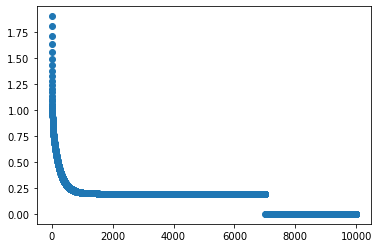

In [719]:
######################################################################
# main
######################################################################

def main():
    # load data
    train_data = load_data(train_path)
    test_data = load_data(test_path)
    
    
    ### ========== TODO : START ========== ###
    # part a: main code for visualizations
    def a():
      print('Visualizing data...')
      plot_data(train_data.X, train_data.y)
      plot_data(test_data.X, test_data.y)
    ### ========== TODO : END ========== ###
    
    ### test
    def test_cost():
      model = PolynomialRegression()
      model.coef_ = np.zeros(2)
      print(model.cost(train_data.X, train_data.y))
    
    ### ========== TODO : START ========== ###
    # parts b-f: main code for linear regression
    def d():
      for eta in (1e-6, 1e-5, 1e-3, 0.05):
        print(f'eta: {eta}')
        model = PolynomialRegression().fit_GD(train_data.X, train_data.y, eta=eta)
        print(model.cost(train_data.X, train_data.y))
        print(model.coef_)
        print()

    def e():
      start = time.time()
      pr = PolynomialRegression().fit(train_data.X, train_data.y)
      end = time.time() 
      print(f"time elapsed: {end - start}")
      print(pr.cost(train_data.X, train_data.y))
      print(pr.coef_)
      start = time.time()
      pr = PolynomialRegression().fit_GD(train_data.X, train_data.y, eta=1e-3)
      end = time.time() 
      print(f"time elapsed: {end - start}")
      
    def f():
      pr = PolynomialRegression().fit_GD(train_data.X, train_data.y)
      print(pr.coef_)
    ### ========== TODO : END ========== ###
    
    
    
    ### ========== TODO : START ========== ###
    # parts g-i: main code for polynomial regression
    def i():
      train_errs = np.zeros(11)
      test_errs = np.zeros(11)
      m_range = list(range(11))
      for m in m_range:
        model = PolynomialRegression(m=m).fit(train_data.X, train_data.y)
        train_errs[m] = model.rms_error(train_data.X, train_data.y)
        test_errs[m] = model.rms_error(test_data.X, test_data.y)
        if m == 5:
          print(model.coef_)
      te = list(test_errs)
      plot_erms(m_range, train_errs, test_errs)
      
    def test_poly():
      ''' visual test of our m=5 polynomial fit '''
      model = PolynomialRegression(m=5).fit(train_data.X, train_data.y)
      coefs = model.coef_
      def f(x):
        return sum(coefs[i] * x ** i for i in range(len(coefs)))
      x = np.linspace(0, 1, 150)
      y = f(x)
      fig = plt.figure()
      plt.plot(x, y)
      plt.scatter(test_data.X, test_data.y)
    e()
      
    ### ========== TODO : END ========== ###


if __name__ == "__main__":
    main()
